# 07a - Performance of MACE model for Rh(111) + *CHOH + *CO

This notebook reproduces Fig. 7a from the manuscript and shows the errors of a MACE model for predicted and true binding energies of CO on a Rh(111) surface containing *CHOH.

In [1]:
from basics import *
from plotting import *
from ase.io import read
import seaborn as sns
from scipy import stats

plt.style.use("paper")

## Obtaining the errors for the model trained on Rh(111)

In [2]:
dset_path = os.path.join("../data", "07-Rh111-mace", "Rh111-test.xyz")

dset = read(dset_path, index=":")

df = []
for i, at in enumerate(dset):
    df.append({
        "index": i,
        "crystal_id": at.info["crystal_id"],
        "nads": (at.numbers == 6).sum() - 1,
        "n_atoms": len(at),
        "true": at.get_potential_energy(),
        "pred": at.info["MACE_energy"],
    })

df = pd.DataFrame(df)

df["npred"] = df["pred"] / df["nads"]
df["ntrue"] = df["true"] / df["nads"]

In [3]:
err = df["npred"] - df["ntrue"]
rmse = np.sqrt((err ** 2).mean()) * 1000
print(rmse)

7.813072131399011


In [4]:
df["nads"].max()

9

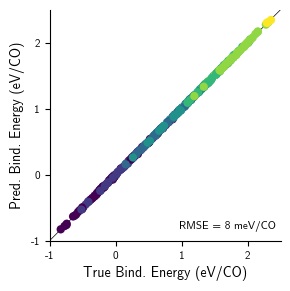

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.scatter(
    df["ntrue"],
    df["npred"],
    c=df["nads"],
    linewidths=0
)
lims = (-1, 2.5)
ax.plot(lims, lims, "k-", zorder=-1, linewidth=0.5)
ax.set_xlim(lims)
ax.set_ylim(lims)

ticks = np.arange(lims[0], lims[1] + 0.1, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_aspect("equal")

ax.set_xlabel("True Bind. Energy (eV/CO)")
ax.set_ylabel("Pred. Bind. Energy (eV/CO)")

ax.annotate(
    f"RMSE = {rmse:.0f} meV/CO",
    (0.98, 0.05),
    xycoords="axes fraction",
    ha="right",
    fontsize=8
)
savefig(fig, "07-Rh111-mace-parity.pdf")
plt.show()

In [6]:
metrics = []

for n, grp in df.groupby("nads"):
    err = grp["npred"] - grp["ntrue"]
    _rmse = np.sqrt((err ** 2).mean()) * 1000
    metrics.append({"nads": n, "rmse": _rmse, "n_points": len(grp)})

metrics = pd.DataFrame(metrics)

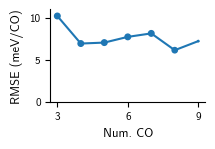

In [7]:
fig, ax = plt.subplots(figsize=(2, 1.2))

ax.plot(metrics["nads"], metrics["rmse"], "-")
ax.scatter(metrics["nads"], metrics["rmse"], s=metrics["n_points"] / 5)

ax.set_ylim(0, 11)
ax.set_xticks([3, 6, 9])
ax.set_ylabel("RMSE (meV/CO)", fontsize=9)
ax.set_xlabel("Num. CO", fontsize=9)

savefig(fig, "07-Rh111-mace-errors.pdf")
plt.show()